***
# Plotting with Matplotlib

- Matplotlib is the standard plotting library for Python
- Not part of core Python, needs to be installed (e.g., via Anaconda) and imported:

    ```python
    import matplotlib.pyplot as plt
    ```
- Higher-level alternative: [seaborn](https://seaborn.pydata.org/)

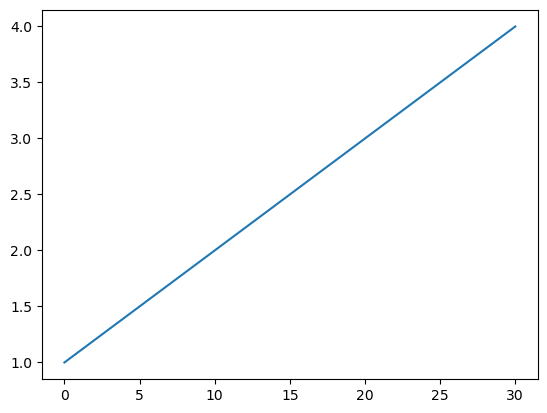

In [1]:
import matplotlib.pyplot as plt

data = [0, 10, 20, 30]
yvalues = [1,2,3,4]
plt.plot(data, yvalues)

***
## Line plots

### Plot single lines

- Use [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

*Example: plotting a single line*

<div class="alert alert-info">
<h3> Your turn</h3>

Plot the quadratic function <i>y = x<sup>2</sup></i> on the interval [-1, 1]:
<ol>
    <li>Create a grid of 50 <i>x</i>-values using <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><tt>np.linspace()</tt></a>.</li>
    <li>Compute the corresponding <i>y</i>-values and plot them.</li>
</ol>
</div>

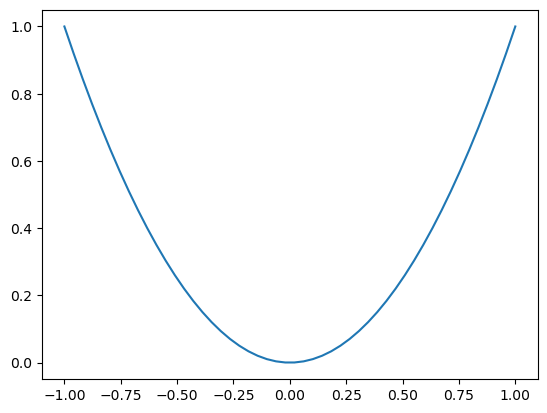

In [2]:
import numpy as np

interval = np.linspace(-1,1,50)
yvals = interval**2
plt.plot(interval, yvals)

### Ploting multiple lines & plot styles

*Main colors*
(see [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for details,
    see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors) for list of named colors):

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

*Line styles:*

-   `-` solid line
-   `--` dashed line
-   `-.` dash-dotted line
-   `:` dotted line

*Marker styles ([complete list](https://matplotlib.org/stable/api/markers_api.html)):*

- `o`: circle
- `s`: square
- `*`: star
- `x`: x
- `d`: (thin) diamond

*Example: Multiple lines in single plot()*

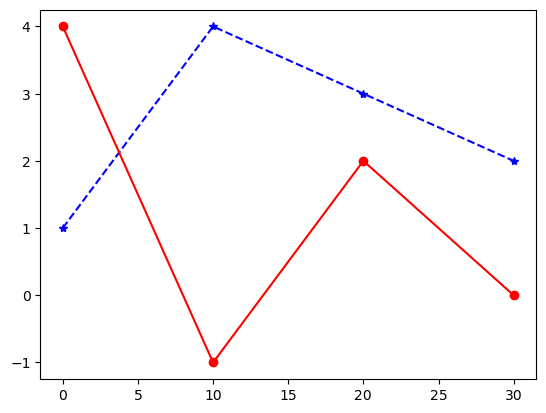

In [6]:
xvalues = [0, 10, 20, 30]
yvals1 = [1, 4, 3, 2]
yvals2 = [4, -1, 2 ,0]

plt.plot(xvalues, yvals1, "b--*", xvalues, yvals2, "r-o")

*Example: Multiple plot() calls*

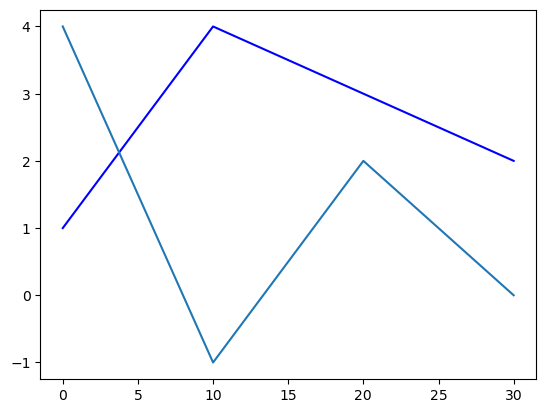

In [11]:
plt.plot(xvalues, yvals1, c="blue")
plt.plot(xvalues, yvals2)

*Example: styling with keyword arguments*

-   See section on _Other Parameters_ in [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
-   Keyword arguments can be abbreviated:

    - `c` or `color`
    - `ls` or `linestyle`
    - `lw` or `linewidth`
    - `ms` or `markersize`

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data from <TT>FRED_annual.csv</TT>. The file contains annual observations
        on selected macroeconomic variables for the US.
    </li>
    <li>Plot the unemployment rate (column <TT>UNRATE</TT>) using a blue dashed line with line width 0.5 and the inflation rate (column <TT>INFLATION</TT>) using an orange line with line width 0.75 in the <i>same</i> figure.</li>
</ol>
</div>

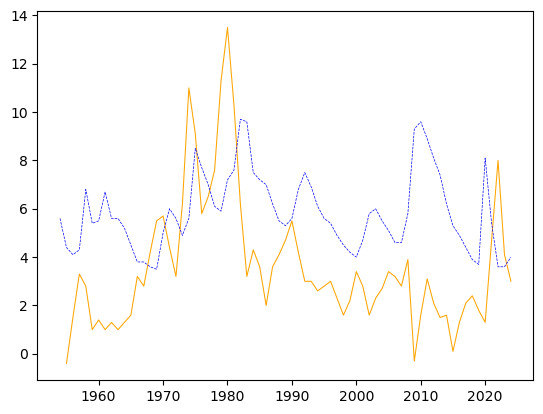

In [13]:
import pandas as pd
DATA_PATH = "../../data"

filename = f"{DATA_PATH}/FRED/FRED_annual.csv"

macro_d = pd.read_csv(filename)
macro_d
plt.plot(macro_d["Year"], macro_d["INFLATION"], c="orange", lw=0.75)
plt.plot(macro_d["Year"], macro_d["UNRATE"], c="blue", ls="--", lw=0.5)


***
## Scatter plots

- Use [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) 

*Example: Scatter y-values randomly drawn from [0, 1)*

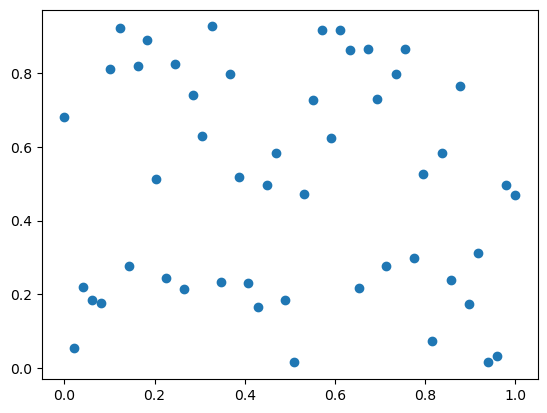

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Number of points
N = 50

# Create 50 uniformly-spaced values on the unit interval
xvalues = np.linspace(0.0, 1.0, N)
# Draw random numbers from interval [0, 1)
yvalues = np.random.default_rng(seed=123).random(N)

plt.scatter(xvalues, yvalues)

*Example: Scatter with marker sizes randomly drawn from [0, 150)*

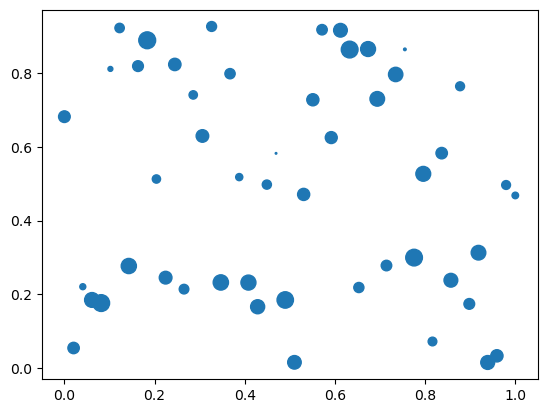

In [22]:
# Draw random marker sizes
size = np.random.default_rng(seed=456).random(N) * 150.0

plt.scatter(xvalues, yvalues, s=size)

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the data in <TT>FRED_monthly.csv</TT>. The file contains monthly observations
        on selected macroeconomic variables for the US.    
    </li>
    <li>Create a scatter plot of the real interest rate (column <TT>REALRATE</TT>) on the y-axis against the Federal Funds rate (column <TT>FEDFUNDS</TT>) on the x-axis.
    Specify the arguments <TT>edgecolors='blue'</TT> and <TT>color='none'</TT> to plot the data as blue rings.
    </li>
</ol>
</div>

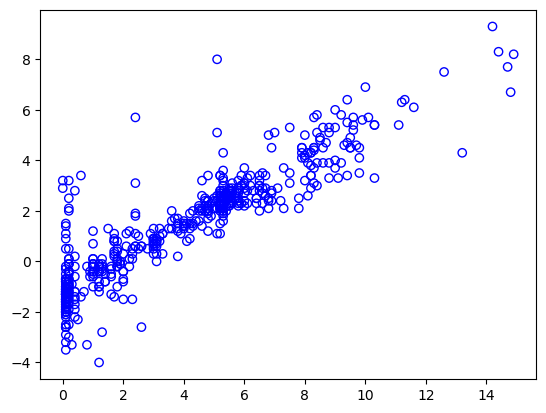

In [19]:
filename2 = f"{DATA_PATH}/FRED/FRED_monthly.csv"

monthly_macro = pd.read_csv(filename2)

plt.scatter(monthly_macro["FEDFUNDS"], monthly_macro["REALRATE"], edgecolors="blue", c="none")

***

## Histograms

- Use [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

*Example: Histogram of normal draws*

- Draw 100 points from normal distribution and plot as histogram

(array([  11.,  114.,  623., 1823., 2995., 2647., 1318.,  405.,   57.,
           7.]),
 array([-3.81886182, -3.02865979, -2.23845776, -1.44825573, -0.6580537 ,
         0.13214833,  0.92235036,  1.71255239,  2.50275442,  3.29295645,
         4.08315848]),
 <BarContainer object of 10 artists>)

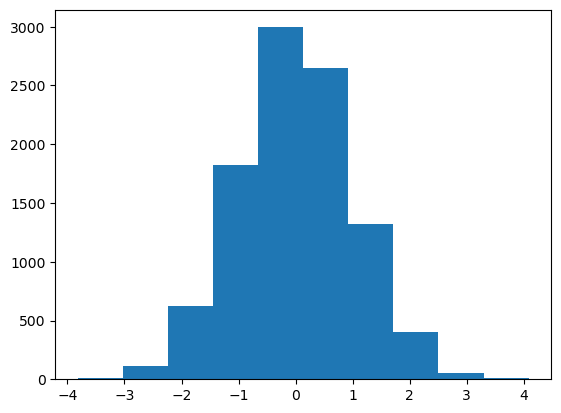

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Draw 10,000 standard-normal numbers
x = np.random.default_rng(seed=1234).normal(size=10_000)

plt.hist(x)

***
## Plotting categorical data

- Create bar charts with [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

*Example: Population sizes by municipality*

<BarContainer object of 4 artists>

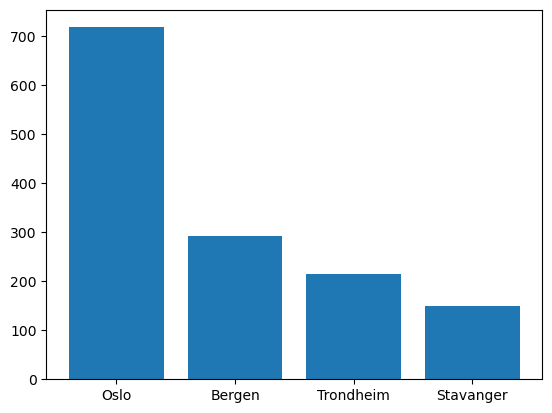

In [24]:
import numpy as np

# Define category labels
municipality = ['Oslo', 'Bergen', 'Trondheim', 'Stavanger']
# Population in thousand
population = np.array([717710, 291940,  214565, 149048]) / 1000

plt.bar(municipality, population)

*Example: Horizontal bar charts*

- Use [`barh()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

<BarContainer object of 4 artists>

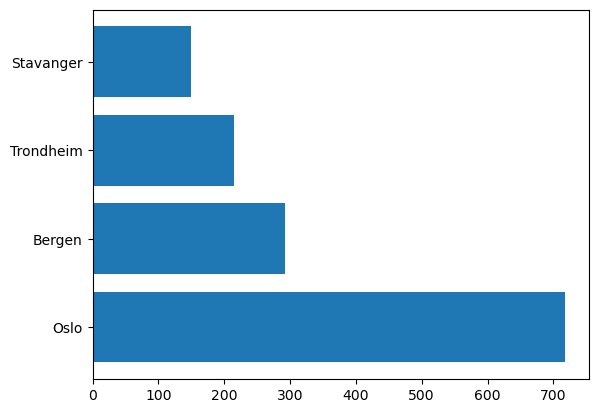

In [25]:
plt.barh(municipality, population)

***
## Adding labels and annotations

-   Titles: [`title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) 
    and [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) 
-   Axes labels:
    [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) 
    and [`ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)
-   Legend: 
    [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
-   Add text at arbitrary position: [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

*Example: Create graph with titles, axes labels, legend, and text*

In [26]:
# Demo data used for plotting
xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

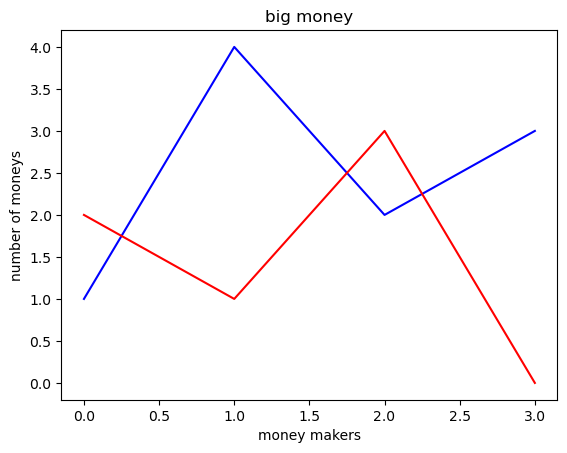

In [28]:
plt.title("big money")
plt.xlabel("money makers")
plt.ylabel("number of moneys")
plt.plot(xvalues, yvalues, c="b")
plt.plot(xvalues, yvalues2, c="r")

***
## Plot limits, ticks and tick labels

-   Plot limits:
    [`xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and 
    [`ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
-   Ticks and tick labels:
    [`xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) 
    and [`yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html)


*Example: sine function plotted on $[0, 2\pi]$*

-   Add $x$-ticks at positions 0, $\pi$, and $2\pi$

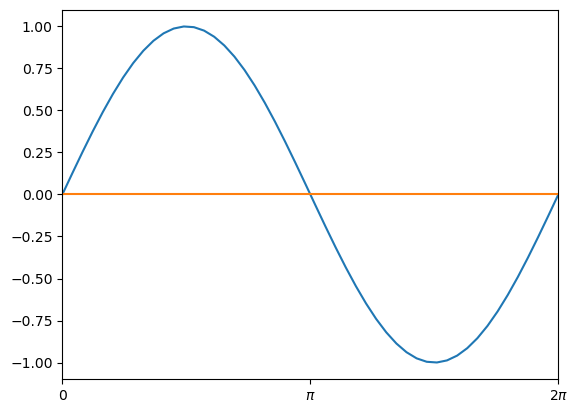

In [ ]:
import numpy as np

# Create data using the sine function
xvalues = np.linspace(0.0, 2*np.pi, 50)
yvalues = np.sin(xvalues)

# Define tick positions
xticks = [0.0, np.pi, 2*np.pi]
# Define tick labels (can use LaTeX code!)
xtick_labels = ['0', r'$\pi$', r'$2\pi$']

plt.plot(xvalues, yvalues)
plt.plot(xvalues, xvalues*0)
plt.xlim(0, 2*np.pi)
plt.xticks(xticks, labels=xtick_labels)
plt.show()

***

## Adding straight lines

- Horizontal lines: [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)
- Vertical lines: [`axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)
- Other: [`axline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib.pyplot.axline)

*Example: Adding horizontal and vertical lines*

- Add horizontal line at 0, vertical lines at $\left[\frac{1}{2}\pi, \frac{3}{2}\pi\right]$ to previous sine function plot

<div class="alert alert-info">
<h3> Your turn</h3>
Plot the function <i>y=(x-1)<sup>2</sup></i> on the interval [0, 2]:
<ol>
    <li>Create a grid of 50 <i>x</i>-values using <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><tt>np.linspace()</tt></a>.</li>
    <li>Compute and plot the <i>y</i>-values.</li>
    <li>Label the <i>x</i>- and <i>y</i>-axes with <i>"x"</i> and <i>"y"</i>.</li>
    <li>Add the title <i>"y = (x-1)^2"</i>.</li>
    <li>Add a vertical line at <i>x=1</i> using a dashed line style.</li>
</ol>

</div>

***
## Object-oriented interface

- Useful for figures with multiple sub-plots
- Cleaner interface
- Operate on instances of [`Figure`](https://matplotlib.org/stable/api/figure_api.html) 
    and [`Axes`](https://matplotlib.org/stable/api/axes_api.html) objects
- Objects are created with [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function:
    ```python
    fig, ax = plt.subplots()
    ```

### Example: annotations in pyplot vs. object-oriented interface

#### pyplot interface

-   This repeats the annotations example from above

Text(0.05, 0.05, 'More text')

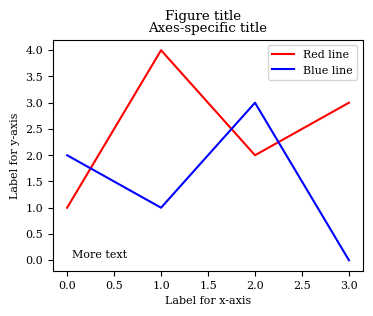

In [ ]:
import matplotlib.pyplot as plt

# Demo data used for plotting
xvalues = [0, 1, 2, 3]
yvalues = [1, 4, 2, 3]
yvalues2 = [2.0, 1.0, 3.0, 0.0]

plt.plot(xvalues, yvalues, color='red')
plt.plot(xvalues, yvalues2, color='blue')

# Add titles, labels, legend, and text
plt.suptitle('Figure title')
plt.title('Axes-specific title')
plt.xlabel('Label for x-axis')
plt.ylabel('Label for y-axis')
plt.legend(['Red line', 'Blue line'])
# Adds text at data coordinates (0.05, 0.05)
plt.text(0.05, 0.05, 'More text')

#### Object-oriented interface

Text(0.05, 0.05, 'More text')

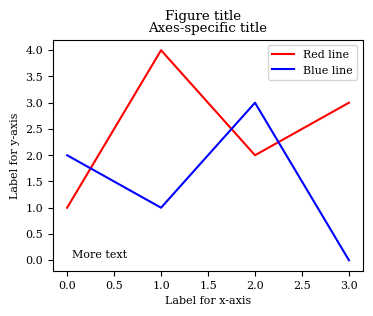

In [ ]:
import matplotlib.pyplot as plt

# Create Figure and Axes objects
fig, ax = plt.subplots()

ax.plot(xvalues, yvalues, color='red', label='Red line')
ax.plot(xvalues, yvalues2, color='blue', label='Blue line')

# Add titles, labels, legend, and text
fig.suptitle('Figure title')                        # Alternative: plt.suptitle()
ax.set_title('Axes-specific title')                 # Alternative: plt.title()
ax.set_xlabel('Label for x-axis')                   # Alternative: plt.xlabel()
ax.set_ylabel('Label for y-axis')                   # Alternative: plt.ylabel()
ax.legend(['Red line', 'Blue line'])                # Alternative: plt.legend()
# Adds text at data coordinates (0.05, 0.05)
ax.text(0.05, 0.05, 'More text')                    # Alternative: plt.text()


***
## Working with multiple plots (axes)

- Use [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to obtain multiple sub-plots (axes)

*Example: Create a plot with 2 panels*

- Plot 1st and 2nd-degree polynomials

*Example: Create a figure with 2 rows and 2 columns*

- Plot polynomials of degrees 1 to 4
- Use `sharex` and `sharey` to enforce identical axes limits

In [ ]:
fig, axes = (1, 4, figsize=(6,3))

axes[i].plot...


<div class="alert alert-info">
<h3> Your turn</h3>
Create a figure with 3 columns (on a single row) and plot the following functions
on the interval [0, 6]:
<ol>
    <li>Subplot 1: <i>y = sin(x)</i></li>
    <li>Subplot 2: <i>y = sin(2*x)</i></li>
    <li>Subplot 3: <i>y = sin(4*x)</i></li>
</ol>

<i>Hint:</i> The sine function can be imported from NumPy as <TT>np.sin()</T>.
</div>

***
# Plotting with pandas

 - Pandas provides convenience functions for plotting


## Bar charts with pandas

- Use pandas's [`plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html):

*Example: Plot population of 15 largest municipalities in Norway*

In [77]:
import pandas as pd

# Path to local data/ folder
DATA_PATH = '../../data'

# Path to CSV file
filepath = f'{DATA_PATH}/population_norway.csv'

# Read in population data for Norwegian municipalities
df = pd.read_csv(filepath)

<Axes: xlabel='Municipality'>

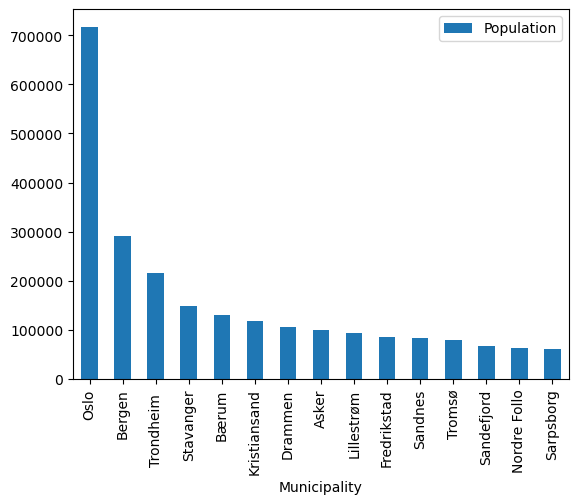

In [85]:
df.iloc[:15].plot.bar(x="Municipality")

***
## Plotting time series data

- Use
[`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) 

*Example: Plot US unemployment rate*

In [86]:
# Path to annual FRED data; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED/FRED_annual.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

<Axes: xlabel='Year'>

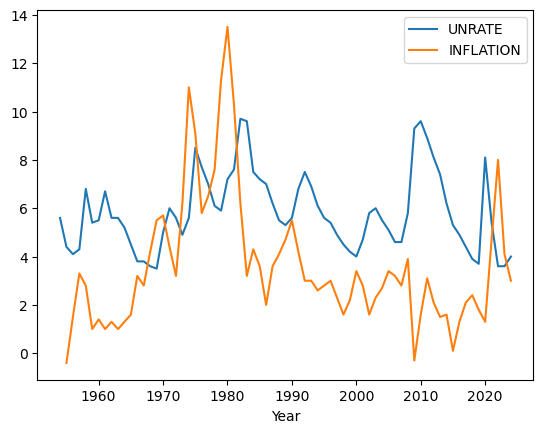

In [87]:
df.plot.line(x="Year",y=["UNRATE", "INFLATION"])

<div class="alert alert-info">
<h3> Your turn</h3>
Use the data files located in the folder <TT>../../data/FRED</TT> to perform the following tasks:
<ol>
    <li>Load the macroeconomic time series data from <TT>FRED_monthly_all.csv</TT>.
        <br/>
        <i>Hint:</i> Use <TT>pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')</TT> to automatically parse strings stored in the <TT>DATE</TT> column as dates and set <TT>DATE</TT> as the index.
        </li>
    <li>Create a line plot, showing both the unemployment rate <TT>UNRATE</TT>
        and the inflation rate <TT>INFLATION</TT> in a single graph.
    </li>
</ol>
</div>

***
## Scatter plots with pandas

### Bivariate scatter plots

- Use [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

*Example: Plot inflation vs. unemployment rate*

In [ ]:
# Path to annual FRED data; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED/FRED_annual.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')

### Scatter plots of more than two variables

- Use [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)


*Example: plot unemployment rate vs. inflation vs. Fed Funds Rate*

In [ ]:
from pandas.plotting import scatter_matrix

# Columns to include in plot
columns = ['UNRATE', 'INFLATION', 'FEDFUNDS']

***
## Box plots with pandas

- Use
[`DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
- Shows median, interquartile range (25th to 75th percentile) and outliers

*Example: Unemployment rate, inflation, and Fed Funds Rate*

In [ ]:
# Path to annual FRED data; DATA_PATH variable was defined above!
filepath = f'{DATA_PATH}/FRED/FRED_annual.csv'

# Read CSV data
df = pd.read_csv(filepath, sep=',')